<a href="https://colab.research.google.com/github/omarlura/talentotech/blob/main/TopicModelingProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01. Instalación de libreria gdown para leer la base desde una ubicación compartida en Google Drive.

In [2]:
!pip install gdown

02. Importamos las liberias que necesitamos para analizar la fuente de datos.

In [3]:
import pandas as pd
import gdown


03. File_Id es el identificador de nuestro archivo compartido a traves de Google Drive.
Url es el vinculo comun denominador que se obtiene al compartir un archivo a traves de Google Drive.

In [4]:
file_id = '1QIrMVqvG4_-RjILqDu0ADHyA73A2BD_l'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'comentarios_criticos.xlsx', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1QIrMVqvG4_-RjILqDu0ADHyA73A2BD_l
To: /content/comentarios_criticos.xlsx
100%|██████████| 284k/284k [00:00<00:00, 60.1MB/s]


'comentarios_criticos.xlsx'

04. Una vez se obtiene la ruta del archivo, leemos el archivo y lo asociamos a un nombre de variable (data).



In [5]:
data = pd.read_excel('comentarios_criticos.xlsx')

5. Con la función data.head() buscamos visualizar rapidamente las primeras filas del dataframe

In [6]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl..."
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...


6. Vamos a instalar Googletrans con el ánimo de permitirnos lograr la traducción de contenido

In [7]:
!pip install deep-translator


7. Aqui vamos a importar la liberaria que necesitamos para traducir el contenido a traves de la herramienta (Translator)


In [8]:
from deep_translator import GoogleTranslator

8. En este codigo queremos automatizar la traducción, agregar una columna con la traducción al dataframe original, para facilitar el análisis.


In [12]:
def translate_to_spanish(text):
    try:
        return GoogleTranslator(source='auto', target='es').translate(text)
    except Exception as e:
        print(f"Error al traducir: {e}")
        return text

# Aplica la función de traducción a cada fila y crea una nueva columna
data['texto de la reseña traducida'] = data['Texto de la Reseña'].apply(translate_to_spanish)

# Muestra el DataFrame con las traducciones
print(data[['Texto de la Reseña', 'texto de la reseña traducida']].head())

                                  Texto de la Reseña  \
0  Cargo por iPhone 13 Pro desde 20% hasta 70% y ...   
1  EDIT 4/6/2023: Well the BG-123 didn't last lon...   
2  This product has come in handy, but I have onl...   
3  Charges slowly. Bigger than the moderately mor...   
4  We finally got this charger fully charged afte...   

                        texto de la reseña traducida  
0  Cargo por iPhone 13 Pro desde 20% hasta 70% y ...  
1  EDITAR 4/6/2023: Bueno, la BG-123 no duró much...  
2  Este producto me ha resultado útil, pero solo ...  
3  Carga lentamente. Es más grande que el modelo ...  
4  Finalmente pudimos cargar completamente este c...  


9. Aqui nuevamente invocamos el data.head() para verificar la nueva columna con la traducción.

In [13]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much..."
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ..."
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...


10. Importamos el modulo "re" y "string" para reemplazar texto y generar la manipulación básica y rápida en cadenas de texto.

In [14]:
import re
import string

11. Con "clean_text" vamos a eliminar caracteres y digitos innecesarios. Tambien remueve signos como "!", vuelve el texto totalmente en minuscula y elimina espacios en blanco alrededor del texto.

 La instrucción "if not isinstance(text, str): return """ verifica que el valor sea de tipo string, si no, deberá convertirlo en una cadena vacía.

In [15]:
def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'á|à|ä|â|ã|å', 'a', text)
    text = re.sub(r'é|è|ë|ê', 'e', text)
    text = re.sub(r'í|ì|ï|î', 'i', text)
    text = re.sub(r'ó|ò|ö|ô|õ|ø', 'o', text)
    text = re.sub(r'ú|ù|ü|û', 'u', text)
    text = re.sub(r'ñ', 'n', text)

    # Eliminación de signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Eliminación de dígitos
    text = re.sub(r'\d+', '', text)

    # Remueve símbolo '¡' si aún está presente
    text = text.replace('¡', '')

    # Convierte el texto a minúsculas
    text = text.lower()

    # Elimina espacios en blanco al inicio y al final
    text = text.strip()

    # Eliminación adicional de signos de puntuación, incluyendo '¡', '¿', y '´'
    punctuation_to_remove = '¡¿´' + string.punctuation
    text = text.translate(str.maketrans('', '', punctuation_to_remove))

    return text

# Aplicación de la función al DataFrame
data['Datos limpios'] = data['texto de la reseña traducida'].apply(clean_text)
print(data['Datos limpios'])


0       cargo por iphone  pro desde  hasta  y se desca...
1       editar  bueno la bg no duro mucho el indicador...
2       este producto me ha resultado util pero solo l...
3       carga lentamente es mas grande que el modelo m...
4       finalmente pudimos cargar completamente este c...
                              ...                        
1485    no se puede usar porque la cubierta de plastic...
1486    cada vez que enchufo un articulo para cargarlo...
1487           el producto no funciona apenas duro un mes
1488    lamento haber tenido que devolverlo no tiene c...
1489    esta cosa tarda una eternidad en cargarse al m...
Name: Datos limpios, Length: 1490, dtype: object


12. Validamos a traves de los encabezados y primeras filas que el ajsute anterior haya sido exitoso en el dataframe.

In [16]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida,Datos limpios
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,cargo por iphone pro desde hasta y se desca...
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much...",editar bueno la bg no duro mucho el indicador...
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ...",este producto me ha resultado util pero solo l...
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...,carga lentamente es mas grande que el modelo m...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...,finalmente pudimos cargar completamente este c...


13. Procedemos a traer el modulo stopwords y nltk.tokenize para eliminar palabras comunes y para tokenizar el texto, en aras de optener un análisis más granular.

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

14. Con la siguiente instrucción, queremos tokenizar las palabras, carga y define los stopwords para cargar palabras vacias que generalmente no aportan significado en tareas de análisis. Luego de eliminar las palabras vacias, unir aquellas palabras de texto restantes y dejar las palabras relevantes.

Ejemplo de uso:
    
    text = "Este es un ejemplo de texto."
    resultado = palabras_vacias(text)
    print(resultado)  # Output: "ejemplo texto"

In [18]:
def palabras_vacias(text):

    # Tokenizar (dividir en palabras)
    words = word_tokenize(text)

    # Eliminar stopwords (palabras vacías)
    stop_words = set(stopwords.words('spanish'))  # Usar español como idioma
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

In [19]:
data['tokenizadas'] = data['Datos limpios'].apply(palabras_vacias)

15. Aquie validamos la aplicación de la función palabras_vacias a cada valor de la columna en el DataFrame data y guarda los resultados en una nueva columna llamada "tokenizadas"

In [20]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida,Datos limpios,tokenizadas
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,cargo por iphone pro desde hasta y se desca...,cargo iphone pro descargo bateria
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much...",editar bueno la bg no duro mucho el indicador...,editar bueno bg duro indicador parcialmente en...
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ...",este producto me ha resultado util pero solo l...,producto resultado util solo usado unas cuanta...
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...,carga lentamente es mas grande que el modelo m...,carga lentamente mas grande modelo moderadamen...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...,finalmente pudimos cargar completamente este c...,finalmente pudimos cargar completamente cargad...


16. Este código permite crear un nuevo dataFrame con las columnas"Usuario" y "tokenizadas" del dataframe original.

In [21]:
columnas = ['Usuario','tokenizadas']
df_1 = data[columnas]
df_1.head()

,Usuario,tokenizadas
0,Nicolas Hernandez,cargo iphone pro descargo bateria
1,David A. Soussan,editar bueno bg duro indicador parcialmente en...
2,Stacy,producto resultado util solo usado unas cuanta...
3,Nathan,carga lentamente mas grande modelo moderadamen...
4,Susan,finalmente pudimos cargar completamente cargad...


17. Este código agrega una columna "tokenizadas_len" al dataFrame.  Este campo contiene el número de palabras en cada texto de la columna "tokenizadas". Este se obtiene a traves del calculo de la división del texto en palabras y la medición de su longitud.

In [22]:
data["tokenizadas_len"] = data["tokenizadas"].apply(lambda x : len(x.split()))

18. Este código imprime la longitud (en palabras) de la reseña más larga en el dataFrame, usando la columna tokenizadas_len. Conocer la reseña de mayor tamaño ayuda a tomar decisiones informadas sobre cómo tratar los datos, optimizar el procesamiento, realizar un análisis más preciso y garantizar la calidad y balance en los datos.

In [23]:
print("Reseña de mayor tamaño: {} words".format(data['tokenizadas_len'].max()))

Reseña de mayor tamaño: 420 words


19. Con el siguiente codigo vamos a gráficar a traves de una esquema gráfico de barras la distribución de la longitud de las reseñas,es decir, validar con qué frecuencia se reseña con un determinado número de palabras

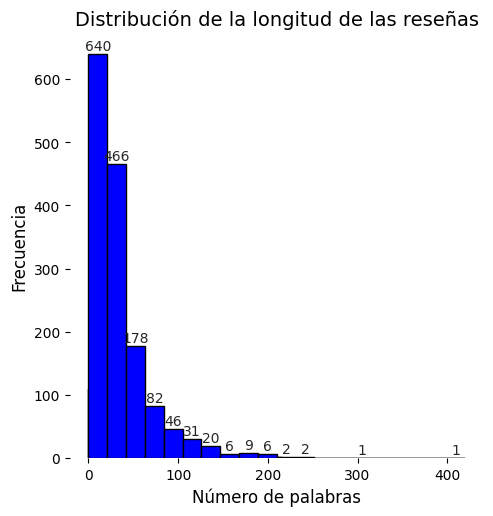

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma sin la curva KDE y con barras rojas
sns.displot(data.tokenizadas_len, kde=False, color='red')

# Personalizar los títulos de los ejes en español
plt.xlabel('Número de palabras', fontsize=12)  # Eje X: Longitud de las reseñas en palabras
plt.ylabel('Frecuencia', fontsize=12)  # Eje Y: Frecuencia de reseñas con esa longitud

# Título del gráfico
plt.title('Distribución de la longitud de las reseñas', fontsize=14)

# Eliminar las líneas de fondo y bordes del gráfico
sns.set(style="white")  # Fondo blanco sin rejilla

# Eliminar la cuadrícula de fondo (líneas de la rejilla)
plt.grid(False)  # Desactiva la cuadrícula de fondo

# Eliminar las líneas de los bordes del gráfico
plt.gca().spines['top'].set_visible(False)  # Eliminar la línea superior
plt.gca().spines['right'].set_visible(False)  # Eliminar la línea derecha
plt.gca().spines['left'].set_visible(False)  # Eliminar la línea izquierda
plt.gca().spines['bottom'].set_visible(False)  # Eliminar la línea inferior

# Eliminar el marco del gráfico
plt.gca().patch.set_visible(False)  # Eliminar el fondo del gráfico

# Obtener los valores del histograma
count, bins, patches = plt.hist(data.tokenizadas_len, bins=20, color='blue', edgecolor='black')

# Añadir las etiquetas sobre cada barra, separadas verticalmente y evitar ceros
for i in range(len(count)):
    if count[i] > 0:  # Solo mostrar etiquetas para barras con valores mayores a 0
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count[i] + 1,  # Ajustar posición vertical
                 f'{int(count[i])}', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()


In [25]:
import warnings
warnings.filterwarnings("ignore")

20. Procedemos a instalar BERTopic para procesar y analizar los volúmenes de datos textuales obtenidos a través de web scraping. El objetivo es  identificar temas recurrentes en los datos de manera eficiente, clasificar información y obtener insights valiosos.

In [26]:
!pip install bertopic

In [27]:
!pip install --upgrade httpx openai

21. A trave del modelo "paraphrase-MiniLM-L3-v2" buscamos obtener una representación semántica eficiente del texto extraído, faclitiando la gestión de  agrupamiento de datos similares, la eliminación de duplicados, la clasificación de contenidos, el análisis de sentimiento y la mejora de los motores de búsqueda.

"%%time" nos permite medir el tiempo de ejecución del proceso.

In [28]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data['tokenizadas'])

2024-11-11 01:05:09,534 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/47 [00:00<?, ?it/s]

2024-11-11 01:06:06,081 - BERTopic - Embedding - Completed ✓
2024-11-11 01:06:06,084 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-11 01:06:23,259 - BERTopic - Dimensionality - Completed ✓
2024-11-11 01:06:23,261 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-11 01:06:23,390 - BERTopic - Cluster - Completed ✓
2024-11-11 01:06:23,400 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-11 01:06:23,537 - BERTopic - Representation - Completed ✓


CPU times: user 54.7 s, sys: 1.19 s, total: 55.9 s
Wall time: 1min 14s


22. A traves del siguiente codigo vamos a revisar los resuletados del modelado de temas, y validar como se distribuyen.

```
model.get_topic_info() devuelve información sobre los temas generados.
len(freq) muestra el número total de temas.
freq.head() ofrece un vistazo rápido a las primeras filas del DataFrame con la información de los tema.
```



In [29]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 4


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_glorificada_linterna_necesitaba_momento,"[glorificada, linterna, necesitaba, momento, r...",[ahora linterna glorificada carga simplemente ...
1,0,1416,0_carga_telefono_bateria_cargador,"[carga, telefono, bateria, cargador, mas, si, ...",[resena actualizada agosto actualizando resena...
2,1,58,1_solar_energia_carga_sol,"[solar, energia, carga, sol, si, horas, panel,...",[compre acampar catalogado banco energia carga...
3,2,15,2_pesado_demasiado_llevarlo_devolvi,"[pesado, demasiado, llevarlo, devolvi, calient...","[devuelto demasiado pesado, demasiado pesado, ..."


23. Con el siguiente codigo queremos acceder a la información detallada sobre un temá especifico identificado por el modelo.



```
freq.iloc[1]["Topic"] extrae el ID del segundo tema desde el DataFrame freq.

model.get_topic(a_topic) devuelve las palabras clave que representan el tema
identificado por el ID a_topic, permitiendo entender mejor de qué trata ese tema.
```



In [ ]:
a_topic = freq.iloc[1]["Topic"]
model.get_topic(a_topic)

[('energia', 0.055714253489061366),
 ('banco', 0.05468496751441654),
 ('mas', 0.01972484825456515),
 ('mah', 0.019607251930117756),
 ('bancos', 0.019590913835542397),
 ('solo', 0.017126648919481697),
 ('bateria', 0.016077601777545053),
 ('cargar', 0.015013129078687857),
 ('si', 0.01448096656092604),
 ('wh', 0.013888862546603462)]

24. Con este código buscamos visualizar los temas más relevantes generados por el modelo BERTopic en forma de un gráfico de barras y explorar la distribución de los temas para entender mejor cuántos documentos están asociados con cada tema.

In [50]:
import plotly.express as px
import pandas as pd

# Obtener la información de los temas y las frecuencias de los 6 temas más relevantes
topic_info = model.get_topic_info()
top_n_topics = 4
top_topics = topic_info.head(top_n_topics)

# Crear un diccionario para mapear el ID del tema a su título descriptivo (palabras clave más relevantes)
topic_titles = {}
for topic_id in top_topics['Topic']:
    # Obtener las palabras clave más representativas de cada tema
    topic_keywords = model.get_topic(topic_id)
    # Crear el título usando las primeras 3 palabras clave
    topic_titles[topic_id] = ' | '.join([word for word, _ in topic_keywords[:3]])

# Crear una lista de los valores para el gráfico
topic_data = {
    "Topic ID": top_topics['Topic'],
    "Frecuencia": top_topics['Count'],
    "Título del Tema": [topic_titles[topic_id] for topic_id in top_topics['Topic']]
}

# Crear un DataFrame para trabajar con Plotly
df_topic_data = pd.DataFrame(topic_data)

# Crear el gráfico de barras con Plotly
fig = px.bar(df_topic_data,
             x='Título del Tema',
             y='Frecuencia',
             title="Frecuencia de los 6 temas más relevantes",
             color_discrete_sequence=['green'])  # Color verde para las barras

# Establecer el fondo blanco para el gráfico
fig.update_layout(
    plot_bgcolor='white',  # Fondo del área de trazado
    paper_bgcolor='white',  # Fondo del gráfico completo
    title_font=dict(size=14, family='Arial'),  # Tamaño y fuente del título
    xaxis_title_font=dict(size=12),  # Tamaño del título del eje X
    yaxis_title_font=dict(size=12)   # Tamaño del título del eje Y
)

# Mostrar el gráfico
fig.show()


In [51]:
model.visualize_hierarchy()

In [58]:
model.visualize_barchart(top_n_topics=6)